<h1 align="center">Why is Python so <s>slow</s> <i>inefficient?</i></h1>
<h2 align="center">(and what can I do about it?)</h2>
&nbsp;
<div align="center">
  <img src="https://ichef.bbci.co.uk/images/ic/640x360/p06vd19l.jpg" />
</div>

<h2 align="center">I don't care. I only use FORTRAN (or C++)</h2>

<div align="center">
  <img src="https://www.fourmilab.ch/documents/univac/figures/card-90col.gif" />
</div>

<h2 align="center">But Python isn't slow!</h2>

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Casio_calculator_JS-20WK_in_201901_002.jpg/533px-Casio_calculator_JS-20WK_in_201901_002.jpg" />
</div>

<h2 align="center">I <i>like</i> that Python is slow!</h2>

<div align="center">
  <img width="600px" src="figures/1_PAY-Boris-Johnson-and-staff-pictured-with-wine-in-Downing-Street-garden-in-May-2020.jpg" />
</div>

## So why _is_ Python slow?
### Python is _*interpreted*_.

<table align="center">
    <tr>
        <td><img width="500px" src="figures/Compiled.jpg" float="right"/></td>
        <td>
  <img width="500px" src="https://iqratechnology.com/wp-content/uploads/2024/09/Python-Program-Execution-1-1024x477.png.webp" float="left"/></td>
    </tr>
    </table>


## So why _is_ Python slow?
### Python is _*interpreted*_.

<table align="center">
    <tr>
        <td>
  <img width="1000px" src="https://iqratechnology.com/wp-content/uploads/2024/09/Python-Program-Execution-1-1024x477.png.webp" float="left"/></td>
    </tr>
    </table>


## So why _is_ Python slow?
### Python is _*dynamically typed*_.

In [69]:
import numpy as np

# Add a random number of objects with random types to the list
def mess_with_my_list(list_of_vars):
    types = [int, float, str]
    values = np.random.uniform(1, 10, np.random.randint(0, 5))
    selector = np.random.randint(0, 3, len(values))
    for selected, value in zip(selector, values):
        list_of_vars.append(types[selected](value))

<div align="center">
  <img width="600px" src="https://images.theconversation.com/files/298413/original/file-20191023-119419-x4f7cv.JPG" />
</div>

In [70]:
list_of_vars = []

for i in range(3):
    mess_with_my_list(list_of_vars)
    print(i, "=>", list_of_vars)

0 => [8, '2.2380556005420535']
1 => [8, '2.2380556005420535', 4.18875929531701, 1, 1.5621248219908221, '8.52512049087612']
2 => [8, '2.2380556005420535', 4.18875929531701, 1, 1.5621248219908221, '8.52512049087612', '5.89392616300223', 6, '8.622772803218197', 7.824458103139399]


## How slow _is_ slow?

* Time for some magic! 

In [71]:
%%timeit -r 1 -n 4

a = np.random.uniform(0, 10)
b = np.random.uniform(0, 10)
c = np.random.uniform(0, 10)

positive_soln = -b + np.lib.scimath.sqrt(b**2 - 4*a*c)/ 2*a
negative_soln = -b - np.lib.scimath.sqrt(b**2 - 4*a*c)/ 2*a

print(f"x = {[positive_soln, negative_soln]}")

x = [np.complex128(-3.2389856118417724+21.19414895537775j), np.complex128(-3.2389856118417724-21.19414895537775j)]
x = [np.float64(-2.523603296918942), np.float64(-3.1298716201852534)]
x = [np.float64(-6.944815440152267), np.float64(-7.922517960274336)]
x = [np.float64(-3.9702812845780255), np.float64(-4.4922191930098565)]
588 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 4 loops each)


## How slow _is_ slow?

* A "quick" example - adding up some numbers.

In [72]:
numbers = np.random.uniform(0, 1, (500, 500, 500))
print(numbers.shape)
print(numbers.size)

(500, 500, 500)
125000000


In [73]:
%%timeit -r 3 -n 1
total = 0
for i in range(500):
    for j in range(500):
        for k in range(500):
            total += numbers[i, j, k]
print(total)

62500503.343674265
62500503.343674265
62500503.343674265
11.3 s ± 58.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


<div align="center">
  <img width="400px" src="https://upload.wikimedia.org/wikipedia/en/5/52/Testcard_F.jpg" />
</div>


## How can we do better?

* Compile your Python?

In [74]:
import numba

In [78]:
@numba.jit(nopython=True)
def add_em_up(numbers):
    total = 0
    for i in range(500):
        for j in range(500):
            for k in range(500):
                total += numbers[i,j,k]
    return total

In [79]:
%%timeit -r 10 -n 1
total = add_em_up(numbers)
print(total)                

62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
66.4 ms ± 19.8 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<div align="center">
  <img width="400px" src="https://c.tenor.com/41I-iMyClCgAAAAd/programmer-programming.gif" />
</div>

In [80]:
%%timeit -r 10 -n 1
total = add_em_up(numbers)
print(total)                

62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
62500503.343674265
64 ms ± 11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## How can we do better?

* Use Python builtin functions e.g. `sum`.

In [81]:
%%timeit -r 10 -n 1

# Need to call sum three times - once for each dimension
total = sum(sum(sum(numbers)))
            
print(total)

62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
62500503.3436644
24.3 ms ± 10.8 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## How can we do better?

* Use `numpy` functions (or `scipy`, `pandas` etc).

In [82]:
%%timeit -r 10 -n 1

total = numbers.sum()
            
print(total)

62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
62500503.343664445
18.1 ms ± 8.56 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<div align="center">
  <img width="400px" src="https://media4.giphy.com/media/4xpB3eE00FfBm/giphy.gif" />
</div>

## Brief aside...

* If you want to **build** a `list` or `dict` of values comprehension expressions can **sometimes** be faster than for loops

In [83]:
flat_numbers = numbers.flatten()

### List comprehension
Using a **list comprehension** expression, we can write a for loop that builds a `list`...

In [84]:
%%timeit -r 1 -n 1
squares = []
for i in range(len(flat_numbers)):
    squares.append(flat_numbers[i] * flat_numbers[i])
    
print(*squares[:10], sep="\n")

0.24665643382866945
0.005938146044562429
0.3280161711514436
0.009101554805645137
0.2879754833099274
0.35741663870855966
1.789616883075112e-06
0.002176427006684793
0.3184884036693895
0.26313036721272826
14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


... like this

In [85]:
%%timeit -r 1 -n 1
squares = [flat_numbers[i] * flat_numbers[i] for i in range(len(flat_numbers))]

print(*squares[:10], sep="\n")

0.24665643382866945
0.005938146044562429
0.3280161711514436
0.009101554805645137
0.2879754833099274
0.35741663870855966
1.789616883075112e-06
0.002176427006684793
0.3184884036693895
0.26313036721272826
14.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Dict comprehension
Using a **dict comprehension** expression, we can write a for loop that builds a `dict`...

In [86]:
%%timeit -r 1 -n 1
squares = dict()
for i in range(len(flat_numbers)//3):
    squares[i] = flat_numbers[i] * flat_numbers[i]
    
print(*[squares[i] for i in range(10)], sep="\n")

0.24665643382866945
0.005938146044562429
0.3280161711514436
0.009101554805645137
0.2879754833099274
0.35741663870855966
1.789616883075112e-06
0.002176427006684793
0.3184884036693895
0.26313036721272826
4.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


... like this

In [87]:
%%timeit -r 1 -n 1
squares = {i : flat_numbers[i] * flat_numbers[i] for i in range(len(flat_numbers)//3)}

4.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Effective `numpy`

<div align="center">
  <img width="400px" src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZjlmNjl4aG41ZnZwYjRmYWptMzRscTV3ODljcDQxaDBvdzZvMHpsOSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/maNB0qAiRVAty/giphy.webp" />
</div>

## Vectorised operations

In [88]:
a = np.random.uniform(size=flat_numbers.size)
b = np.random.uniform(size=flat_numbers.size)
c = np.random.uniform(size=flat_numbers.size)

### The old-fashioned way
Processing **100th** of the total data (I only have 40 mins!)

In [89]:
%%timeit -r 1 -n 1
y = []
for i in range(a.size//100):
    y.append(-b[i] + np.lib.scimath.sqrt(b[i]**2 - 4*a[i]*c[i])/ 2*a[i])
    
print(y[:20])

[np.complex128(-0.30674123372623074+0.5264080644594722j), np.complex128(-0.13580273720124458+0.12952455263988075j), np.float64(-0.7342768265074368), np.complex128(-0.23917485630703184+0.23839150819930333j), np.complex128(-0.7696532352267218+0.17742414951485708j), np.complex128(-0.06603766033727065+0.13783313475927206j), np.complex128(-0.4373922892669404+0.03016159301657711j), np.complex128(-0.45526290252183466+0.5679671045113102j), np.complex128(-0.567028083189296+0.30820920775608673j), np.complex128(-0.8148029294673814+0.14760055177603124j), np.complex128(-0.022701938614931083+0.46386299237445844j), np.complex128(-0.29692566658551744+0.5292090867867644j), np.complex128(-0.45758072213038214+0.3972841906689501j), np.complex128(-0.16337375854596925+0.3739989902794295j), np.complex128(-0.4292399423626718+0.48671886504908446j), np.complex128(-0.26329639920770487+0.6057673654826561j), np.float64(-0.6353853528139768), np.complex128(-0.673201287119331+0.1328092242630346j), np.complex128(-0.50

<div align="center">
  <img width="400px" src="https://c.tenor.com/Z4t8sZCrOuMAAAAM/riker.gif" />
</div>

### Now with `numpy` vectorised ops.
We'll do the lot this time!

In [90]:
%%timeit -r 1 -n 1

y = -b + np.lib.scimath.sqrt(b**2 - 4*a*c)/ 2*a

print(list(y[:20]))

[np.complex128(-0.30674123372623074+0.5264080644594722j), np.complex128(-0.13580273720124458+0.12952455263988075j), np.complex128(-0.7342768265074368+0j), np.complex128(-0.23917485630703184+0.23839150819930333j), np.complex128(-0.7696532352267218+0.17742414951485708j), np.complex128(-0.06603766033727065+0.13783313475927206j), np.complex128(-0.4373922892669404+0.03016159301657711j), np.complex128(-0.45526290252183466+0.5679671045113102j), np.complex128(-0.567028083189296+0.30820920775608673j), np.complex128(-0.8148029294673814+0.14760055177603124j), np.complex128(-0.022701938614931083+0.46386299237445844j), np.complex128(-0.29692566658551744+0.5292090867867644j), np.complex128(-0.45758072213038214+0.3972841906689501j), np.complex128(-0.16337375854596925+0.3739989902794295j), np.complex128(-0.4292399423626718+0.48671886504908446j), np.complex128(-0.26329639920770487+0.6057673654826561j), np.complex128(-0.6353853528139768+0j), np.complex128(-0.673201287119331+0.1328092242630346j), np.comp

<div align="center">
  <img width="400px" src="https://media1.tenor.com/m/0ygiqFaX-ssAAAAC/bongo-cat-typing.gif" />
</div>

## The dreaded stack trace

In [91]:
a = np.random.uniform(size=(4,2,3))
b = np.random.uniform(size=(4,3))
print(a, b, sep="\n\n")

[[[0.17431149 0.71733978 0.24403584]
  [0.78335043 0.2984568  0.15277229]]

 [[0.00682352 0.5352476  0.70654181]
  [0.72123259 0.06811657 0.11728254]]

 [[0.66621608 0.46776398 0.39400886]
  [0.24472406 0.44323961 0.13597167]]

 [[0.21052765 0.01630123 0.35624166]
  [0.83160118 0.35498414 0.86909939]]]

[[0.58150793 0.3463746  0.75699461]
 [0.7311528  0.54479286 0.52313376]
 [0.93872125 0.91408753 0.22800041]
 [0.11075694 0.64355783 0.21364416]]


In [92]:
c = a * b

ValueError: operands could not be broadcast together with shapes (4,2,3) (4,3) 

In [93]:
result = []

for i in range(2):
    result.append(a[:,i,:]*b)

print(np.array(result))

[[[0.10136352 0.24846828 0.18473381]
  [0.00498904 0.29159907 0.36961587]
  [0.62539119 0.42757722 0.08983418]
  [0.0233174  0.01049078 0.07610895]]

 [[0.45552449 0.10337785 0.1156478 ]
  [0.52733123 0.03710942 0.06135445]
  [0.22972768 0.4051598  0.0310016 ]
  [0.09210561 0.22845282 0.18567801]]]


<div align="center">
  <img width="400px" src="https://c.tenor.com/LRtRSo1uhQsAAAAC/star-trek-picard.gif" />
</div>

## The `shape` of numpy arrays

<div align="center">
  <img width="700px" src="https://i.stack.imgur.com/NWTQH.png" />
</div>

In [94]:
print(a.shape)
print(a.sum(axis=0).shape)
print(a.prod(axis=1).shape)
print(a.cumsum(axis=2).shape)

(4, 2, 3)
(2, 3)
(4, 3)
(4, 2, 3)


`numpy` mathematical function reference [https://numpy.org/doc/stable/reference/routines.math.html](https://numpy.org/doc/stable/reference/routines.math.html)

## The `shape` of numpy arrays

An array with shape `(4,3,2)` is a _nested_ data structure - an array of 4 arrays of 3 arrays of 2 elements.

<div align="center">
  <img width="400px" src="https://c.tenor.com/bvfEFc8xI_0AAAAd/llama-stare.gif" />
</div>

## The `shape` of numpy arrays

An array of 4 arrays of 3 arrays of 2 elements.

In [95]:
np.random.random(size=(4,3,2))

array([[[0.02516563, 0.25040538],
        [0.50258993, 0.37598391],
        [0.34614676, 0.72209467]],

       [[0.72558809, 0.63823399],
        [0.89900616, 0.90942242],
        [0.31642154, 0.22635098]],

       [[0.31815324, 0.59514292],
        [0.14766682, 0.03819707],
        [0.43047394, 0.49413905]],

       [[0.90887801, 0.42475785],
        [0.3673205 , 0.89951682],
        [0.64469712, 0.70410704]]])

## Broadcasting
* How `numpy` performs arithmetic on arrays with different shapes.
* The **innermost** nested dimensions must match.

In [96]:
print(a.shape)

(4, 2, 3)


In [99]:
a * np.random.uniform(size=3)

array([[[0.02379846, 0.26805934, 0.19115286],
        [0.10694955, 0.11152892, 0.11966628]],

       [[0.0009316 , 0.20001417, 0.55343301],
        [0.0984687 , 0.02545416, 0.09186721]],

       [[0.09095739, 0.17479653, 0.30862648],
        [0.03341177, 0.16563214, 0.10650638]],

       [[0.02874299, 0.00609153, 0.2790435 ],
        [0.11353714, 0.13265236, 0.68076409]]])

In [100]:
a * np.random.uniform(size=(2, 3))

array([[[0.14682245, 0.49399333, 0.12411479],
        [0.7607264 , 0.00861225, 0.06308558]],

       [[0.00574745, 0.36859624, 0.35934184],
        [0.7004026 , 0.00196557, 0.04843049]],

       [[0.56115334, 0.3221239 , 0.20038994],
        [0.23765616, 0.01279009, 0.05614796]],

       [[0.17732729, 0.01122578, 0.18118183],
        [0.80758362, 0.0102434 , 0.35888473]]])

In [101]:
a * np.random.uniform(size=(4, 2, 3))

array([[[0.05680845, 0.02316985, 0.10941563],
        [0.41462758, 0.11604348, 0.00270922]],

       [[0.00219227, 0.43366741, 0.4970965 ],
        [0.46775289, 0.01451429, 0.03844542]],

       [[0.43633265, 0.03976068, 0.25828206],
        [0.07276114, 0.42057759, 0.04721076]],

       [[0.09910737, 0.0127373 , 0.04652593],
        [0.66946689, 0.04259297, 0.80435143]]])

## Coercing shapes with `rollaxis` and `swapaxes`
&nbsp;
<div align="center">
  <img width="400px" src="https://c.tenor.com/3rGvpHXONYYAAAAC/tesseract.gif" />
</div>


In [102]:
print("a", a.shape, "b", b.shape, sep="\n")

a
(4, 2, 3)
b
(4, 3)


`rollaxis` moves the selected dimension to the "outside".

In [103]:
rolled = np.rollaxis(a, 1)
print(rolled.shape, np.array(result).shape)
rolled * b == np.array(result)

(2, 4, 3) (2, 4, 3)


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

`swapaxes` swaps two axes - surprise, surprise!

In [104]:
swapped = np.swapaxes(a, 0, 1)
print(swapped.shape, np.array(result).shape)
swapped * b == np.array(result)

(2, 4, 3) (2, 4, 3)


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

Other examples like `transpose` (`T`), `moveaxis` at [https://numpy.org/doc/stable/reference/routines.array-manipulation.html#transpose-like-operations](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#transpose-like-operations)

## Applying functions

&nbsp;
<div align="center">
  <img width="400px" src="https://c.tenor.com/AnWNRWE78A8AAAAM/apply-apply-apply-apply.gif" />
</div>

Efficiently computing values using subsets of a multi-dimensional array.

In [105]:
from astropy.cosmology import Planck18

In [106]:
def angular_diameter_distance_range(redshifts):
    min_dist = Planck18.angular_diameter_distance(redshifts.min())
    max_dist = Planck18.angular_diameter_distance(redshifts.max())
    return max_dist - min_dist

In [107]:
a

array([[[0.17431149, 0.71733978, 0.24403584],
        [0.78335043, 0.2984568 , 0.15277229]],

       [[0.00682352, 0.5352476 , 0.70654181],
        [0.72123259, 0.06811657, 0.11728254]],

       [[0.66621608, 0.46776398, 0.39400886],
        [0.24472406, 0.44323961, 0.13597167]],

       [[0.21052765, 0.01630123, 0.35624166],
        [0.83160118, 0.35498414, 0.86909939]]])

In [108]:
np.apply_along_axis(angular_diameter_distance_range, 2, a)

<Quantity [[ 901.51432728, 1016.10676171],
           [1492.76020052, 1256.9053594 ],
           [ 354.48385016,  701.06938931],
           [ 992.42843896,  574.93794146]] Mpc>

Be **careful** with applying your own function. It's not always as fast as you think (example coming later). Always prefer native `numpy` functions or vectorised arithmetic.

## Pandas (Sorry this bit won't work without some data)

&nbsp;
<div align="center">
  <img width="400px" src="https://i.pinimg.com/originals/f3/34/ea/f334ea7f813f6178a40368e2706f13dd.gif" />
</div>



In [109]:
import pandas as pd

In [110]:
big_data_file = "/Users/hjd229/Desktop/SW_std_sldata_bhs.parquet.gz"

In [111]:
big_data = pd.read_parquet(
    big_data_file
)

In [112]:
big_data

,Macc,Mcomp,a,Kdon,Rcomp,L,m,m_corr,tau_eff,b,rE,visible,pristine,mu,mwc,dmax,n_rec,n_points,weight
0,8.8,23.8,13000.0,1,20.0,180000.0,6.87,12.5,15.460,0.172,0.985,1,1,1.00484,0,6.68,0.121383,556.430343,4.444910e-07
2,9.1,9.3,9980.0,2,78.0,8900.0,7.88,12.5,66.800,15.910,0.878,1,1,1.00025,0,4.44,0.135035,2404.638262,4.565690e-08
3,8.3,8.0,35900.0,5,44.0,230000.0,7.16,12.5,NaN,42.170,1.590,0,1,1.00234,0,6.88,0.000000,1.000000,5.331390e-08
6,8.8,22.6,2100.0,1,21.0,140000.0,7.76,12.5,5.958,20.840,0.395,1,1,1.00053,0,6.48,1.833250,214.495455,3.497950e-05
7,15.3,28.2,309000.0,2,1100.0,270000.0,7.06,12.5,NaN,296.800,6.350,0,1,1.00007,0,7.02,0.000000,1.000000,4.665140e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152945564,9.1,19.2,3490.0,2,76.0,120000.0,6.28,12.5,31.060,20.460,0.521,1,1,1.00009,3,6.35,0.809851,1118.319794,1.361500e-08
152945569,7.7,7.6,9980.0,1,6.1,4500.0,10.50,12.5,6.090,3.034,0.807,1,1,1.03401,3,2.85,0.123186,219.254438,0.000000e+00
152945570,8.9,1.1,66900.0,6,660.0,48000.0,7.10,12.5,1950.000,69.790,2.250,1,1,1.00002,3,3.46,0.005721,70194.078204,1.512580e-18
152945573,8.8,5.7,52900.0,2,21.0,1800.0,11.20,12.5,30.000,9.321,2.000,1,1,1.01789,3,3.32,0.009844,1080.105005,3.799490e-16


### That example I promised

In [114]:
import astropy.units as apunits
import astropy.constants as apconst

In [115]:
def computePeriod(data, keepunit=False, unit=None):
    T = np.sqrt(
        4
        * (data.a.to_numpy() * apconst.R_sun) ** 3
        * np.pi ** 2
        / (apconst.G * (data.Macc.to_numpy() + data.Mcomp.to_numpy()) * apconst.M_sun)
    )
    if unit is not None:
        T = T.to(unit)
    return T if keepunit else T.value

def computePeriod2(data, keepunit=False, unit=None):
    T = np.sqrt(
        4
        * (data.a * apconst.R_sun) ** 3
        * np.pi ** 2
        / (apconst.G * (data.Macc + data.Mcomp) * apconst.M_sun)
    )
    if unit is not None:
        T = T.to(unit)
    return T if keepunit else T.value

In [116]:
%%timeit -r 1 -n 1
periods = computePeriod(big_data, True, apunits.year)

844 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


This time with 1/500th of the data!

In [117]:
%%timeit -r 1 -n 1
big_data.iloc[:big_data.shape[0]//500].apply(computePeriod2, args=(True, apunits.year), axis=1)

7.55 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Let's make a quick plot

In [118]:
import matplotlib.pyplot as plt

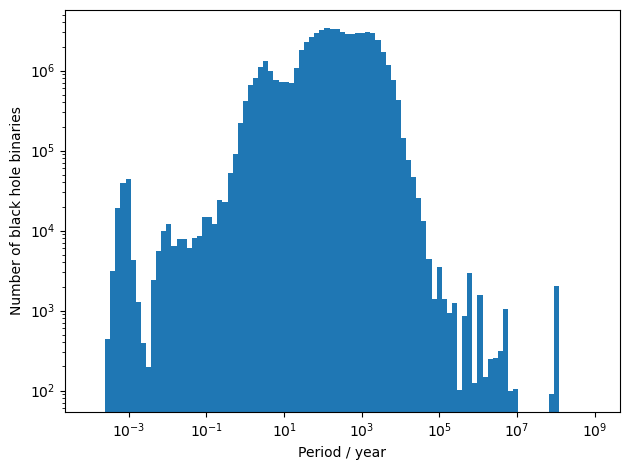

In [119]:
# compute the periods again
periods = computePeriod(big_data, True, apunits.year).value

# plot a histogram 
_ = plt.hist(periods, 
             bins=np.logspace(-4, 9, 100)
            )

# set log axes
plt.xscale("log")
plt.yscale("log")

# add axis titles
plt.ylabel("Number of black hole binaries")
plt.xlabel("Period / year")

# make it pretty
plt.tight_layout()